In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
shiv = pd.read_csv('/content/used_car_dataset.csv')
shiv

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017


In [ ]:
shiv.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [ ]:
shiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


In [ ]:
#counting missing values

shiv.isnull().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

In [ ]:
#counting duplicate values

shiv.duplicated().sum()

92

In [ ]:
shiv = shiv.drop_duplicates()

In [ ]:
print("Rows : ",shiv.shape[0])
print("Columns : ",shiv.shape[1])
print("Duplicate values =" ,shiv.duplicated().sum())

Rows :  2013
Columns :  6
Duplicate values = 0


DATA CLEANING FOR KMS_DRIVEN


In [ ]:
shiv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2013 non-null   object
 1   car_price_in_rupees  2013 non-null   object
 2   kms_driven           2013 non-null   object
 3   fuel_type            2013 non-null   object
 4   city                 2013 non-null   object
 5   year_of_manufacture  2013 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 110.1+ KB


In [ ]:
import re
def preprocess_string(s):
    s = re.sub(r'[^\d.]', '',s)
    return float(s)

In [ ]:
# Now preprocess "car_price_in_rupees" column

shiv['car_price_in_rupees'] = shiv['car_price_in_rupees'].apply(preprocess_string)

# Now preprocess "car_price_in_rupees" column

shiv['kms_driven'] = shiv['kms_driven'].apply(preprocess_string).astype(int)

<ipython-input-210-1f8916e6f59e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shiv['car_price_in_rupees'] = shiv['car_price_in_rupees'].apply(preprocess_string)
<ipython-input-210-1f8916e6f59e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shiv['kms_driven'] = shiv['kms_driven'].apply(preprocess_string).astype(int)


In [ ]:
shiv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2013 non-null   object 
 1   car_price_in_rupees  2013 non-null   float64
 2   kms_driven           2013 non-null   int64  
 3   fuel_type            2013 non-null   object 
 4   city                 2013 non-null   object 
 5   year_of_manufacture  2013 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 110.1+ KB


Outliers

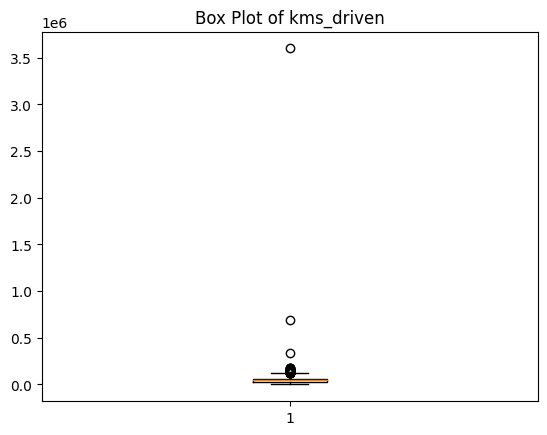

In [ ]:
plt.boxplot(shiv['kms_driven'])
plt.title('Box Plot of kms_driven')
plt.show()

In [ ]:
Q1 = shiv['kms_driven'].quantile(0.25)
Q3 = shiv['kms_driven'].quantile(0.75)
IQR = Q3 - Q1

# Using IQR to Filter Outliers
shiv_filtered = shiv[(shiv['kms_driven'] >= Q1 - 1.5 * IQR) & (shiv['kms_driven'] <= Q3 + 1.5 * IQR)]

shiv = shiv_filtered

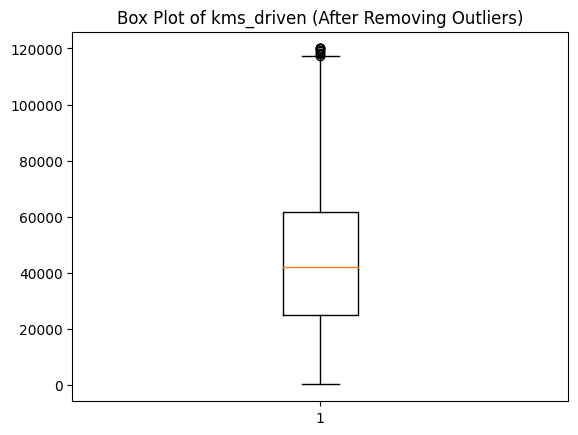

In [ ]:
plt.boxplot(shiv['kms_driven'])
plt.title('Box Plot of kms_driven (After Removing Outliers)')
plt.show()

In [ ]:
shiv.shape

(1975, 6)

In [ ]:
shiv.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,4.45,22402,Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,2.93,10344,Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,22.49,12999,Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,6.95,45000,Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],12.00,11193,Petrol,Kolkata,2019


DATA CLEANING FOR FUEL TYPE

In [ ]:
shiv.fuel_type.unique()

array(['Petrol', 'Diesel', 'Electric', 'CNG', 'Petrol + 1', 'Diesel + 1',
       'Hybrid', 'LPG'], dtype=object)

In [ ]:
shiv['fuel_type'].describe()

count       1975
unique         8
top       Petrol
freq        1276
Name: fuel_type, dtype: object

<Axes: xlabel='fuel_type', ylabel='Count'>

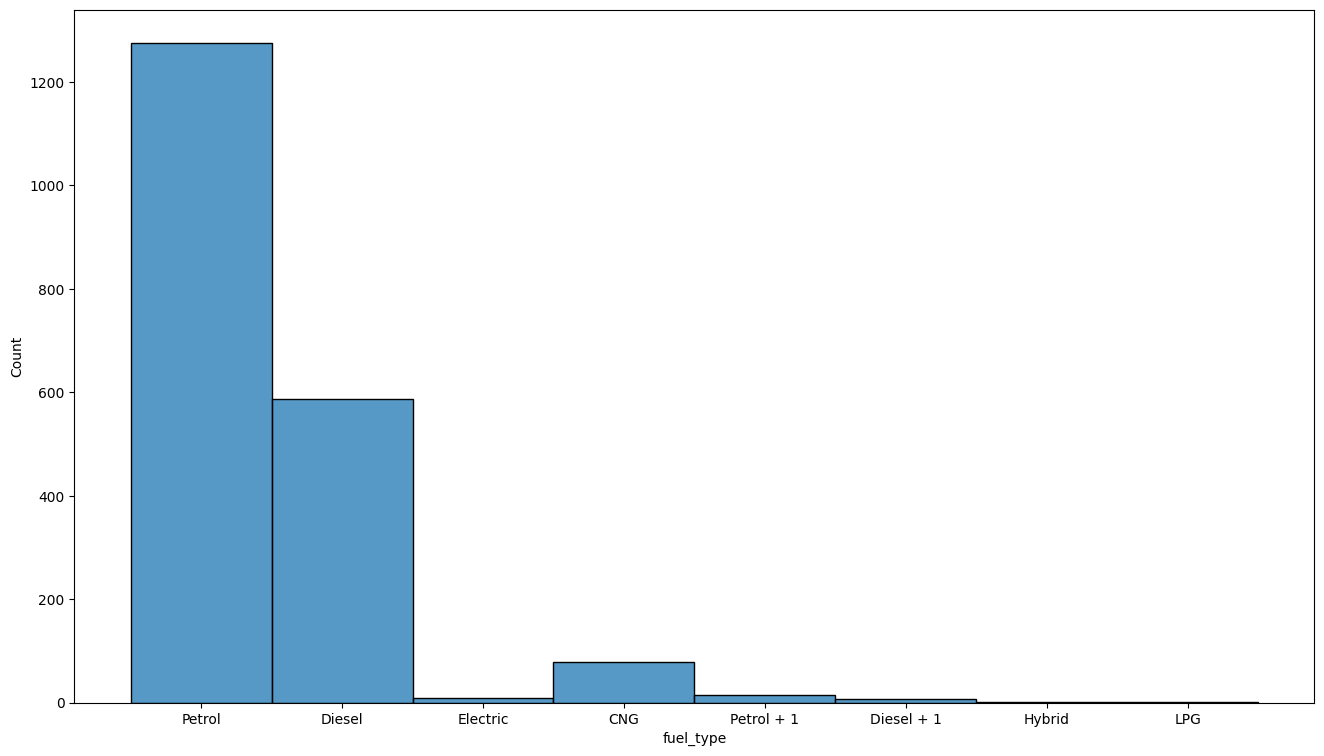

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(shiv['fuel_type'])

In [ ]:
shiv.loc[shiv["fuel_type"] == "Diesel + 1", "fuel_type"] = "Diesel"

In [ ]:
shiv.fuel_type.unique()

array(['Petrol', 'Diesel', 'Electric', 'CNG', 'Petrol + 1', 'Hybrid',
       'LPG'], dtype=object)

In [ ]:
shiv.loc[shiv["fuel_type"] == "Petrol + 1", "fuel_type"] = "Petrol"

In [ ]:
shiv.fuel_type.unique()

array(['Petrol', 'Diesel', 'Electric', 'CNG', 'Hybrid', 'LPG'],
      dtype=object)

<Axes: xlabel='fuel_type', ylabel='Count'>

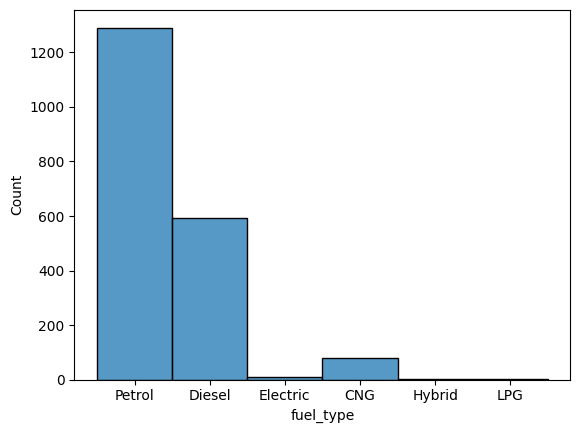

In [ ]:
sns.histplot(shiv['fuel_type'])

In [ ]:
shiv.shape

(1975, 6)

In [ ]:
shiv = shiv.drop(shiv[(shiv.fuel_type == "Hybrid")].index)

In [ ]:
shiv.fuel_type.unique()

array(['Petrol', 'Diesel', 'Electric', 'CNG', 'LPG'], dtype=object)

<Axes: xlabel='fuel_type', ylabel='Count'>

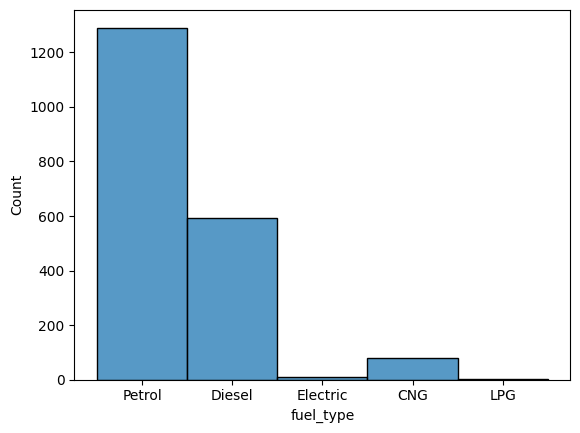

In [ ]:
sns.histplot(shiv['fuel_type'])

In [ ]:
shiv.shape

(1973, 6)

In [ ]:
shiv = shiv.drop(shiv[(shiv.fuel_type == "LPG")].index)

In [ ]:
shiv.fuel_type.unique()

array(['Petrol', 'Diesel', 'Electric', 'CNG'], dtype=object)

In [ ]:
shiv.shape

(1971, 6)

<Axes: xlabel='fuel_type', ylabel='Count'>

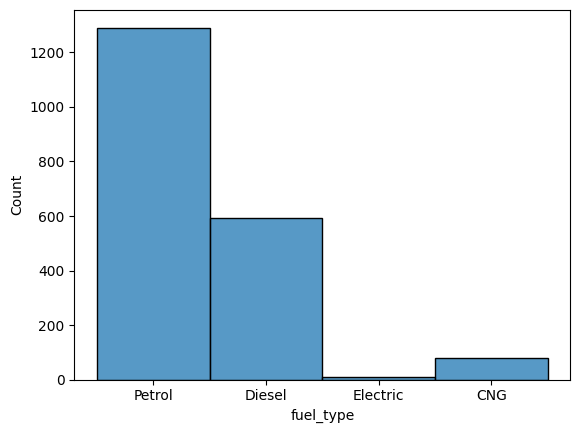

In [ ]:
sns.histplot(shiv['fuel_type'])

In [ ]:
shiv['fuel_type'] = shiv['fuel_type'].replace(['Electric', 'CNG'], 'alternative_eco_fuel')

In [ ]:
shiv['fuel_type'].unique()

array(['Petrol', 'Diesel', 'alternative_eco_fuel'], dtype=object)

<Axes: xlabel='fuel_type', ylabel='Count'>

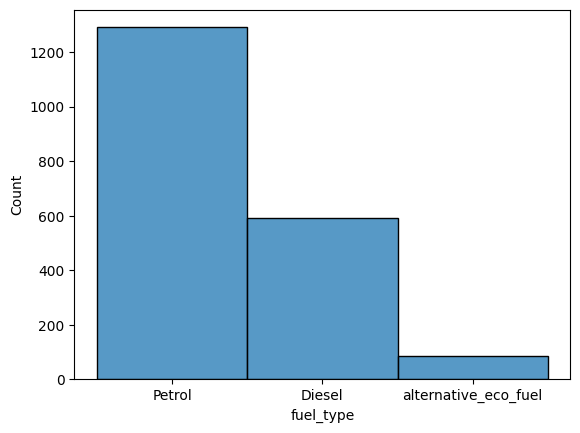

In [ ]:
sns.histplot(shiv['fuel_type'])

One Hot Encoding

In [ ]:
shiv['fuel_Petrol'] = shiv.apply(lambda row: 1 if (row["fuel_type"] == "Petrol") else 0, axis=1)

In [ ]:
shiv['fuel_Diesel'] = shiv.apply(lambda row: 1 if (row["fuel_type"] == "Diesel") else 0, axis=1)

In [ ]:
shiv['fuel_alternative_eco'] = shiv.apply(lambda row: 1 if (row["fuel_type"] == "alternative_eco_fuel") else 0, axis=1)

In [ ]:
shiv.drop(columns=['fuel_type'], inplace=True)

In [ ]:
shiv.head()

,car_name,car_price_in_rupees,kms_driven,city,year_of_manufacture,fuel_Petrol,fuel_Diesel,fuel_alternative_eco
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,4.45,22402,Mumbai,2016,1,0,0
1,Maruti Suzuki Alto 800 Lxi,2.93,10344,Kolkata,2019,1,0,0
2,Tata Safari XZ Plus New,22.49,12999,Bangalore,2021,0,1,0
3,Maruti Suzuki Ciaz ZXI+,6.95,45000,Thane,2016,1,0,0
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],12.00,11193,Kolkata,2019,1,0,0


<ipython-input-242-34bf92e70253>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


<Axes: ylabel='fuel_alternative_eco'>

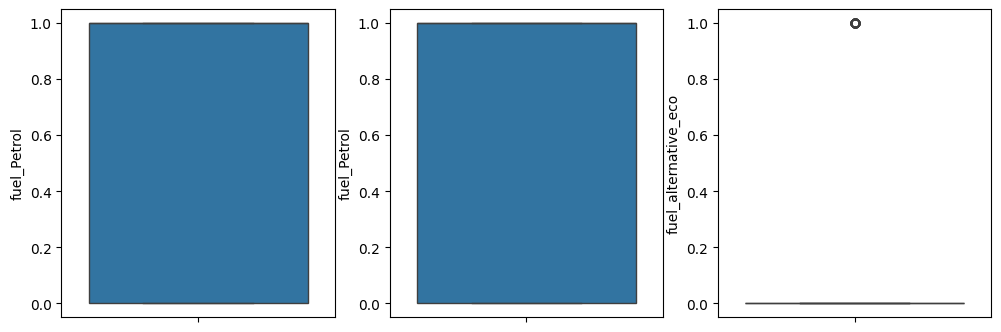

In [ ]:
# Visualizing Data

plt.subplots(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(shiv['fuel_Petrol'])

plt.subplot(1, 3, 2)
sns.boxplot(shiv['fuel_Petrol'])

plt.subplot(1, 3, 3)
sns.boxplot(shiv['fuel_alternative_eco'])


In [ ]:
Q1 = shiv['fuel_alternative_eco'].quantile(0.25)
Q3 = shiv['fuel_alternative_eco'].quantile(0.75)
IQR = Q3 - Q1

# Using IQR to Filter Outliers
shiv_filtered = shiv[(shiv['fuel_alternative_eco'] >= Q1 - 1.5 * IQR) & (shiv['fuel_alternative_eco'] <= Q3 + 1.5 * IQR)]

shiv = shiv_filtered

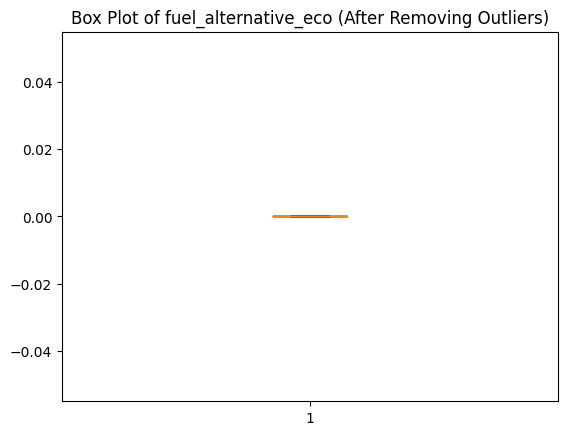

In [ ]:
# Visualizing Data After Removing Outliers
plt.boxplot(shiv['fuel_alternative_eco'])
plt.title('Box Plot of fuel_alternative_eco (After Removing Outliers)')
plt.show()

In [ ]:
shiv.shape

(1884, 8)

Data Cleaning for year_of_manufacture

In [ ]:
shiv['age'] = shiv.apply(lambda row: 2024 - row["year_of_manufacture"], axis=1)

In [ ]:
shiv.drop(columns=['year_of_manufacture'], inplace=True)

In [ ]:
shiv.head()

,car_name,car_price_in_rupees,kms_driven,city,fuel_Petrol,fuel_Diesel,fuel_alternative_eco,age
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,4.45,22402,Mumbai,1,0,0,8
1,Maruti Suzuki Alto 800 Lxi,2.93,10344,Kolkata,1,0,0,5
2,Tata Safari XZ Plus New,22.49,12999,Bangalore,0,1,0,3
3,Maruti Suzuki Ciaz ZXI+,6.95,45000,Thane,1,0,0,8
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],12.00,11193,Kolkata,1,0,0,5


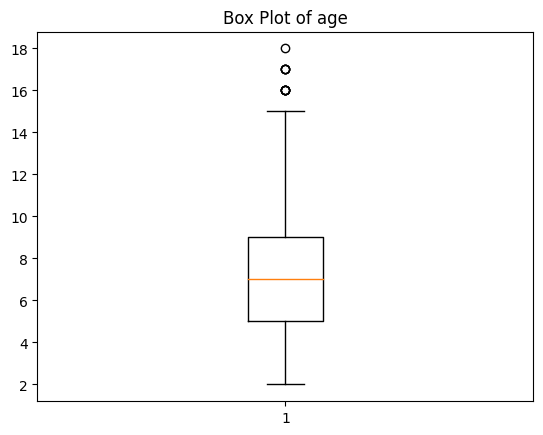

In [ ]:
# Visualizing Data
plt.boxplot(shiv['age'])
plt.title('Box Plot of age')
plt.show()

In [ ]:
Q1 = shiv['age'].quantile(0.25)
Q3 = shiv['age'].quantile(0.75)
IQR = Q3 - Q1

# Using IQR to Filter Outliers
shiv_filtered = shiv[(shiv['age'] >= Q1 - 1.5 * IQR) & (shiv['age'] <= Q3 + 1.5 * IQR)]

shiv = shiv_filtered

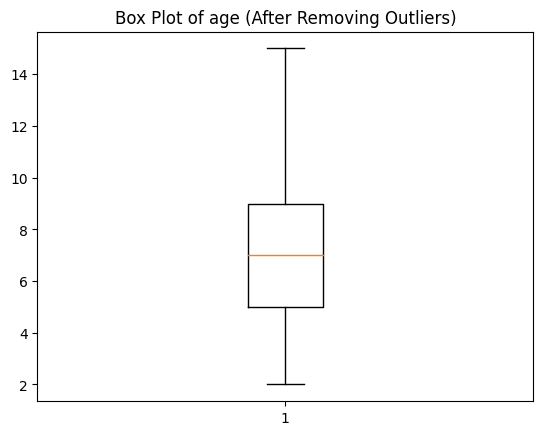

In [ ]:
# Visualizing Data After Removing Outliers
plt.boxplot(shiv['age'])
plt.title('Box Plot of age (After Removing Outliers)')
plt.show()

In [ ]:
shiv.shape

(1873, 8)

Data Cleaning for car_name

In [ ]:
shiv.insert(1, "car_brand", shiv["car_name"].str.split(" ").str[0])

In [ ]:
shiv.car_brand.unique()

array(['Hyundai', 'Maruti', 'Tata', 'Jeep', 'Toyota', 'Renault', 'Ford',
       'Porsche', 'Kia', 'BMW', 'Honda', 'Audi', 'MG', 'Skoda',
       'Mercedes-Benz', 'Chevrolet', 'Volkswagen', 'Volvo', 'Mahindra',
       'Nissan', 'Land', 'Isuzu', 'Jaguar', 'MINI', 'Datsun', 'Fiat',
       'Citroen'], dtype=object)

In [ ]:

car_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Toyota', 'Volkswagen', 'Porsche', 'Volvo', 'Jaguar', 'Land',
              'Ford', 'Honda', 'Chevrolet', 'Hyundai', 'Kia', 'Nissan', 'Renault', 'Skoda', 'MINI', 'MG', 'Mahindra',
              'Tata', 'Isuzu', 'Jeep', 'Datsun', 'Fiat', 'Citroen', 'Bentley','Maruti']



In [ ]:
len(shiv)

1873

In [ ]:

for brand_name in car_brands:
    shiv.loc[shiv["car_brand"] == brand_name, "car_brand"] = ((car_brands.index(brand_name) + 1) / len(shiv)) * 100

In [ ]:
shiv.car_brand.unique()

array([0.6940736785904965, 1.4949279231179926, 1.1211959423384943,
       1.2279765082754939, 0.21356113187399892, 0.8542445274959957,
       0.5339028296849974, 0.32034169781099836, 0.7474639615589963,
       0.10678056593699946, 0.587293112653497, 0.16017084890549918,
       1.014415376401495, 0.9076348104644953, 0.05339028296849973,
       0.6406833956219967, 0.2669514148424987, 0.37373198077949815,
       1.0678056593699947, 0.800854244527496, 0.4805125467164976,
       1.174586225306994, 0.42712226374799783, 0.9610250934329952,
       1.2813667912439934, 1.3347570742124935, 1.388147357180993],
      dtype=object)

In [ ]:
shiv.rename(columns={'car_brand': 'car_brand_score'}, inplace=True)

In [ ]:
shiv.drop(columns=['car_name'], inplace=True)

In [ ]:
shiv.head()

,car_brand_score,car_price_in_rupees,kms_driven,city,fuel_Petrol,fuel_Diesel,fuel_alternative_eco,age
0,0.694074,4.45,22402,Mumbai,1,0,0,8
1,1.494928,2.93,10344,Kolkata,1,0,0,5
2,1.121196,22.49,12999,Bangalore,0,1,0,3
3,1.494928,6.95,45000,Thane,1,0,0,8
4,1.227977,12.00,11193,Kolkata,1,0,0,5


Data Cleaning for city

In [ ]:
shiv.drop(columns=['city'], inplace=True)

In [ ]:
shiv.head()

,car_brand_score,car_price_in_rupees,kms_driven,fuel_Petrol,fuel_Diesel,fuel_alternative_eco,age
0,0.694074,4.45,22402,1,0,0,8
1,1.494928,2.93,10344,1,0,0,5
2,1.121196,22.49,12999,0,1,0,3
3,1.494928,6.95,45000,1,0,0,8
4,1.227977,12.00,11193,1,0,0,5


Independent And dependent features

In [ ]:
X=shiv.drop('car_price_in_rupees',axis=1)
y=shiv['car_price_in_rupees']

In [ ]:
X.head()

,car_brand_score,kms_driven,fuel_Petrol,fuel_Diesel,fuel_alternative_eco,age
0,0.694074,22402,1,0,0,8
1,1.494928,10344,1,0,0,5
2,1.121196,12999,0,1,0,3
3,1.494928,45000,1,0,0,8
4,1.227977,11193,1,0,0,5


In [ ]:
y.head()

0     4.45
1     2.93
2    22.49
3     6.95
4    12.00
Name: car_price_in_rupees, dtype: float64

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((1311, 6), (562, 6))

In [ ]:
y_train.shape,y_test.shape

((1311,), (562,))

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled

array([[ 1.41790156, -0.70707573, -1.43634401,  1.43634401,  0.        ,
        -0.7317769 ],
       [-0.33057992, -0.34789232,  0.69621205, -0.69621205,  0.        ,
        -1.11112032],
       [-0.44714535,  0.45191026, -1.43634401,  1.43634401,  0.        ,
         1.54428363],
       ...,
       [-0.33057992,  0.15070622,  0.69621205, -0.69621205,  0.        ,
         0.40625337],
       [-0.33057992, -0.15454755,  0.69621205, -0.69621205,  0.        ,
         0.78559679],
       [-1.72936511, -0.49035477, -1.43634401,  1.43634401,  0.        ,
         1.16494021]])

Linear Regression

Mean absolute error 6.138664348040638
R2 Score 0.38725930078800086


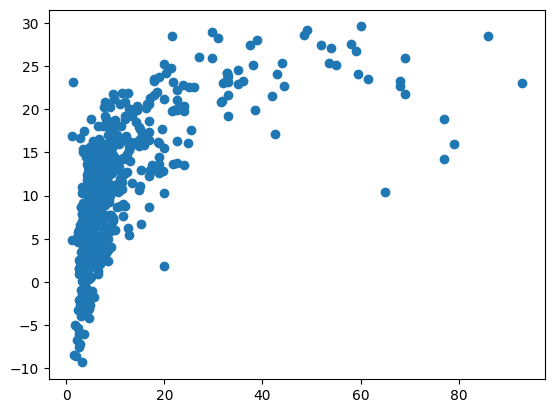

In [ ]:
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Lasso Regression

Mean absolute error 5.9237474121956435
R2 Score 0.3465123789127137


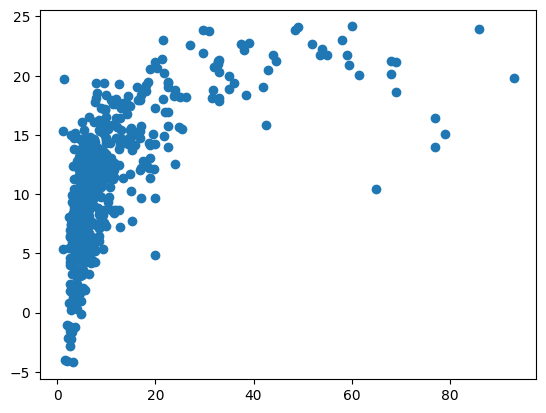

In [ ]:
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

KNN

Mean absolute error 4.318487544483985
R2 Score 0.5596602693134348


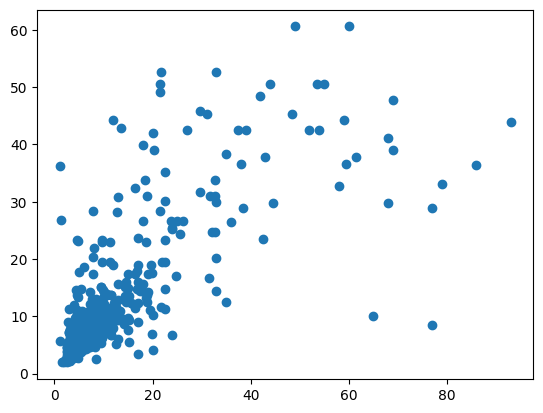

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train_scaled, y_train)
y_pred = knn_regressor.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Random Forest Regression

Mean absolute error 3.618410943060498
R2 Score 0.7086744613846266


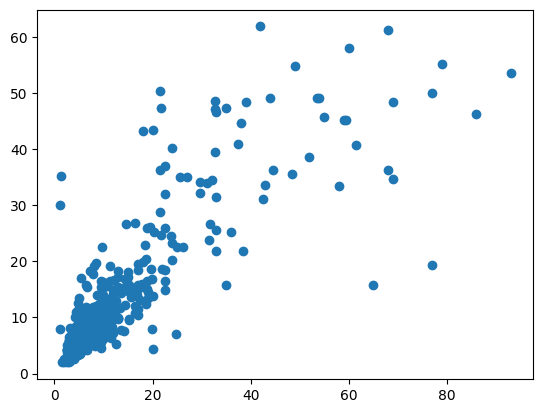

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Creating ML Model using Random Forest Regressor

Mean absolute error 3.618410943060498
R2 Score 0.7086744613846266


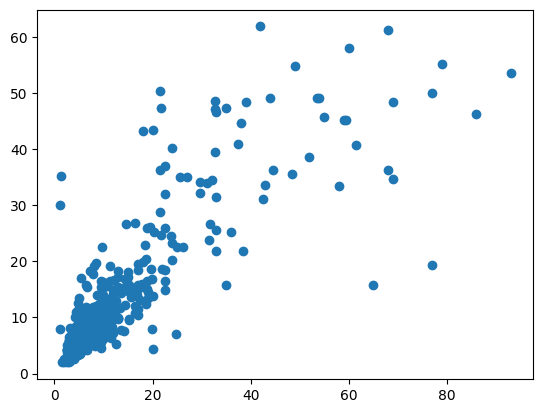

In [ ]:
import pickle
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
pickle.dump(model , open('car_price.pk1' , 'wb'))

Making Prediction

In [ ]:
import pickle
car_price_model = pickle.load(open('car_price.pk1' , 'rb'))
car_price_model_accuracy = car_price_model.score(X_test_scaled, y_test)
print("Car Price Model Accuracy:" , car_price_model_accuracy * 100 , "%")

Car Price Model Accuracy: 70.86744613846267 %
